# Seoul Bike Rental

## Objectives

#### Analyze and create visual data on the correlation between conditions and the number of public shared bicycle rentals in Seoul from December 2017 to November 2018.

## Pseudocode

#### import all the required modules

#### read SeoulBikeData.csv file and save as dataframe

#### read SeoulDustData.csv file and save as dataframe

#### merge the two data based on date and time

#### Drop all rows with "No Functioning" 

#### handing outliers and choosing the correct expression method 

#### Visualize the relationship between "Rented Bike Count" and condition parameters 

## import modules

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load SeoulBikeData

#### Source from UCI Machine Learning Repository

#### https://doi.org/10.24432/C5F62R

In [376]:
file = "SeoulBikeData.csv"
bike_data = pd.read_csv(file)
pd.concat([bike_data.head(), bike_data.tail()])

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Load SeoulDustData

#### Source from KMA(Korea Meteorological Administration).

#### https://data.kma.go.kr/data/climate/selectDustRltmList.do?pgmNo=68

In [377]:
dust_file = "SeoulDustData.csv"
dust_data = pd.read_csv(dust_file)
pd.concat([dust_data.head(), dust_data.tail()])

,Location Number,Location,DateTime,Fine dust concentration(ug/m^3)
0,116,Seoul,2017-12-01 0:00,18
1,116,Seoul,2017-12-01 1:00,14
2,116,Seoul,2017-12-01 2:00,14
3,116,Seoul,2017-12-01 3:00,14
4,116,Seoul,2017-12-01 4:00,13
7563,116,Seoul,2018-11-30 19:00,31
7564,116,Seoul,2018-11-30 20:00,16
7565,116,Seoul,2018-11-30 21:00,15
7566,116,Seoul,2018-11-30 22:00,18
7567,116,Seoul,2018-11-30 23:00,14


## Change the "Date" and "Hour" expression format of "dust_data" before merger

In [378]:
dust_data = dust_data.drop(['Location Number', 'Location'], axis = 1)
dust_data[['Date', 'Hour']] = dust_data['DateTime'].str.split(' ', n = 1, expand = True)
dust_data.drop('DateTime', axis = 1, inplace = True)

pd.concat([dust_data.head(), dust_data.tail()])

,Fine dust concentration(ug/m^3),Date,Hour
0,18,2017-12-01,0:00
1,14,2017-12-01,1:00
2,14,2017-12-01,2:00
3,14,2017-12-01,3:00
4,13,2017-12-01,4:00
7563,31,2018-11-30,19:00
7564,16,2018-11-30,20:00
7565,15,2018-11-30,21:00
7566,18,2018-11-30,22:00
7567,14,2018-11-30,23:00


In [379]:
dust_data['Date'] = pd.to_datetime(dust_data['Date']).dt.strftime('%d/%m/%Y')
dust_data['Hour'] = dust_data['Hour'].str.replace(':00', '')

pd.concat([dust_data.head(), dust_data.tail()])

,Fine dust concentration(ug/m^3),Date,Hour
0,18,01/12/2017,0
1,14,01/12/2017,1
2,14,01/12/2017,2
3,14,01/12/2017,3
4,13,01/12/2017,4
7563,31,30/11/2018,19
7564,16,30/11/2018,20
7565,15,30/11/2018,21
7566,18,30/11/2018,22
7567,14,30/11/2018,23


## Match the datatypes and merge “Bike_Data” and “Dust_Data”

In [380]:
print("bike_data's Date, Hour Datatype")
print(bike_data.dtypes[['Date', 'Hour']])
print(' ')
print("dust_data's Date, Hour Datatype")
print(dust_data.dtypes[['Date', 'Hour']])

bike_data's Date, Hour Datatype
Date    object
Hour     int64
dtype: object
 
dust_data's Date, Hour Datatype
Date    object
Hour    object
dtype: object


In [405]:
bike_data['Hour'] = bike_data['Hour'].astype(str)
merged_data = pd.merge(bike_data, dust_data, on = ['Date', 'Hour'], how = 'outer')
pd.concat([merged_data.head(), merged_data.tail()])

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Fine dust concentration(ug/m^3)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,18.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,14.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,14.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,14.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,13.0
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,31.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,16.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,15.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,18.0
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,14.0


In [406]:
print(merged_data.dtypes)

Date                                object
Rented Bike Count                    int64
Hour                                object
Temperature                        float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature              float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
Fine dust concentration(ug/m^3)    float64
dtype: object


## Drop all rows with "No Functioning"

In [382]:
merged_data = merged_data[merged_data["Functioning Day"] == "Yes"]
merged_data.reset_index(drop = True, inplace = True)
pd.concat([merged_data.head(), merged_data.tail()])

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Fine dust concentration(ug/m^3)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,18.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,14.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,14.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,14.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,13.0
8460,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,31.0
8461,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,16.0
8462,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,15.0
8463,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,18.0
8464,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,14.0


## Visualize the relationship between "Rented Bike Count" and "temperature"

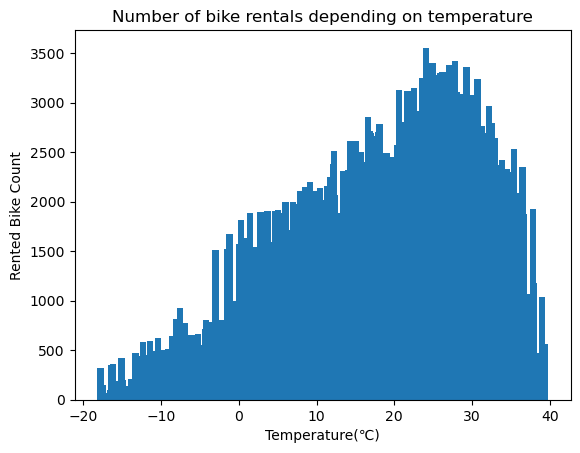

In [250]:
X = merged_data["Temperature"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Temperature(℃)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on temperature')
plt.bar(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Humidty" (Handing outliers)

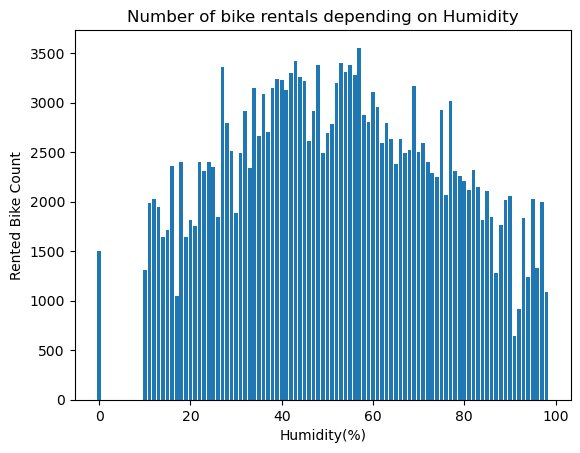

In [251]:
X = merged_data["Humidity(%)"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Humidity')
plt.bar(X, Y)
plt.show()

### I judged that 0% humidity was not measured because it was lower than the threshold, and assigned it to the number of rentals with the second lowest humidity.

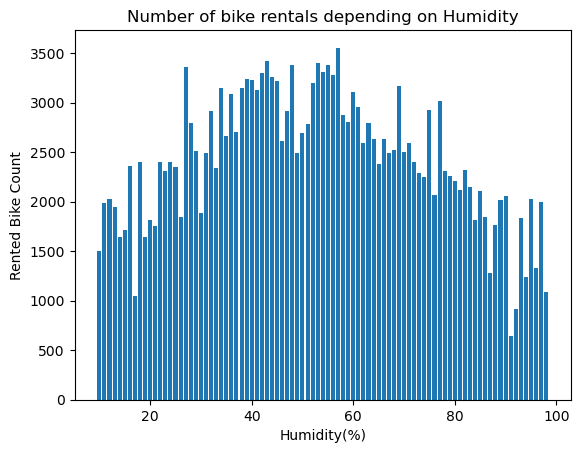

In [413]:
condition = (merged_data['Humidity(%)'] == 0)
second_lowest = merged_data.loc[merged_data['Humidity(%)'] > 0 , 'Humidity(%)'].min()
merged_data.loc[condition, 'Humidity(%)'] = second_lowest

X = merged_data["Humidity(%)"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Humidity')
plt.bar(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Wind speed"

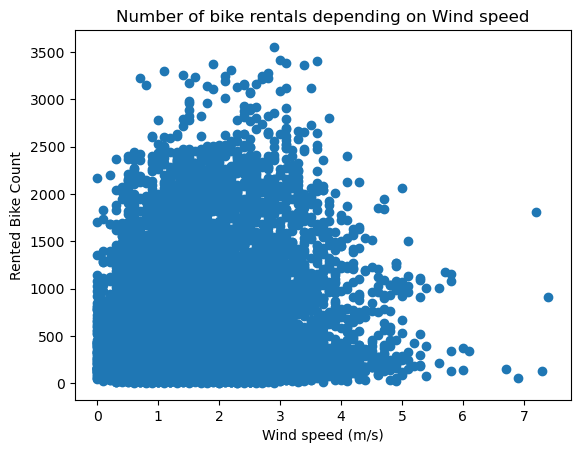

In [290]:
X = merged_data["Wind speed (m/s)"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Wind speed')
plt.scatter(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Visibility"

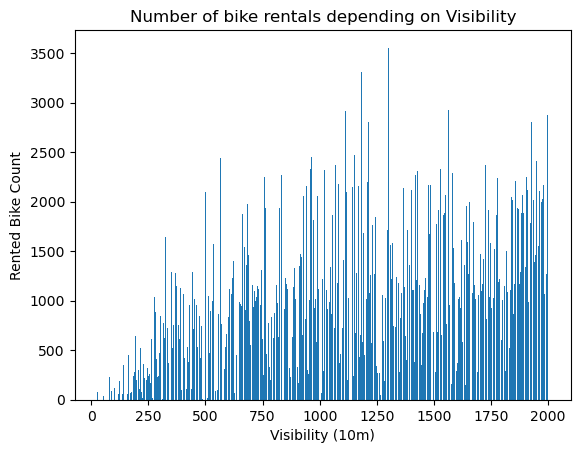

In [254]:
X = merged_data["Visibility (10m)"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Visibility')
plt.bar(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Dew point temperature"

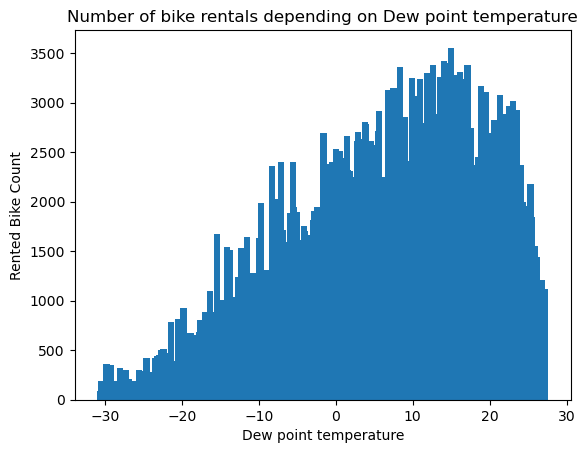

In [255]:
X = merged_data["Dew point temperature"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Dew point temperature')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Dew point temperature')
plt.bar(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Solar Radiation"

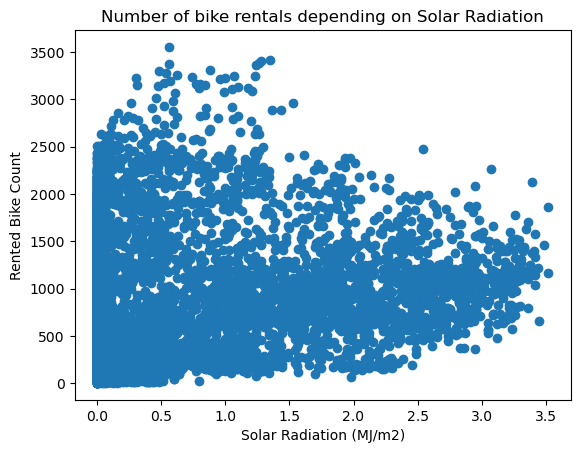

In [289]:
X = merged_data["Solar Radiation (MJ/m2)"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Solar Radiation')
plt.scatter(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Rainfall"

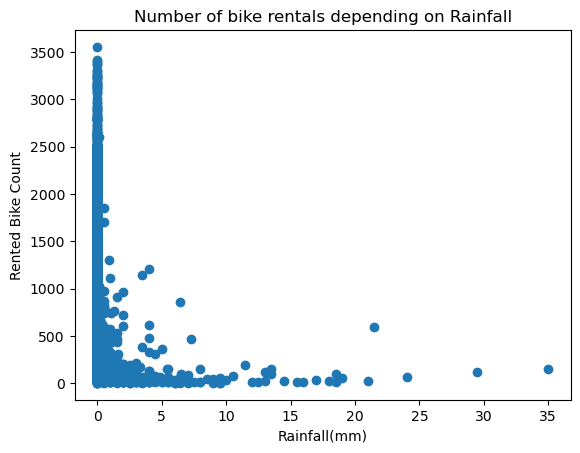

In [288]:
X = merged_data["Rainfall(mm)"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Rainfall')
plt.scatter(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Snowfall"

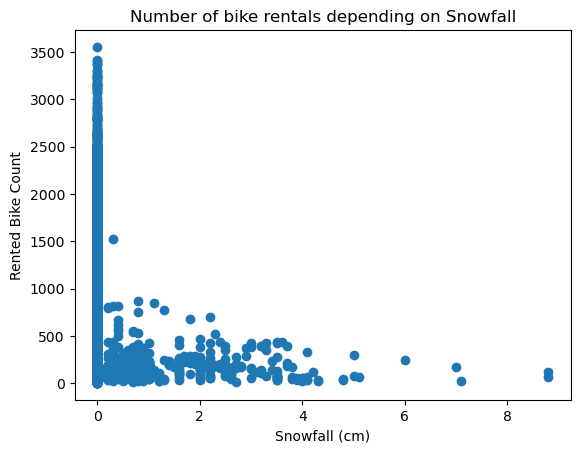

In [287]:
X = merged_data["Snowfall (cm)"]
Y = merged_data["Rented Bike Count"]
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Snowfall')
plt.scatter(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Seasons" (+ Reflects differences in number of days per season version)

In [342]:
Counts_Spring = merged_data[merged_data["Seasons"] == "Spring"].shape[0]
Counts_Summer = merged_data[merged_data["Seasons"] == "Summer"].shape[0]
Counts_Autumn = merged_data[merged_data["Seasons"] == "Autumn"].shape[0]
Counts_Winter = merged_data[merged_data["Seasons"] == "Winter"].shape[0]

print("Numers of Spring hours is", Counts_Spring)
print("Numers of Summer hours is", Counts_Summer)
print("Numers of Autumn hours is", Counts_Autumn)
print("Numers of Winter hours is", Counts_Winter)

Numers of Spring hours is 2208
Numers of Summer hours is 2208
Numers of Autumn hours is 2184
Numers of Winter hours is 2160


In [343]:
counts_per_seasons = merged_data.groupby("Seasons")["Rented Bike Count"].sum()
counts_per_seasons

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

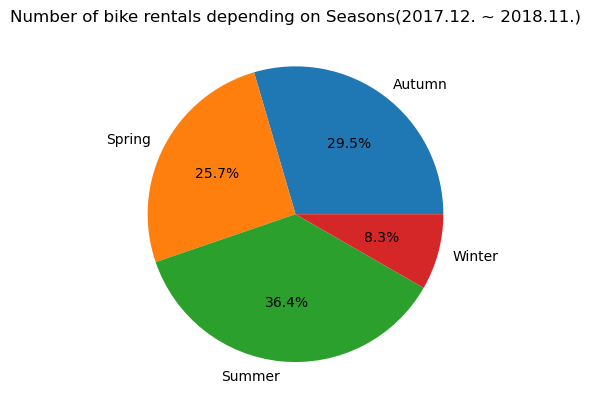

In [351]:
plt.pie(counts_per_seasons, labels = counts_per_seasons.index, autopct = '%1.1f%%')
plt.title('Number of bike rentals depending on Seasons(2017.12. ~ 2018.11.)')
plt.show()

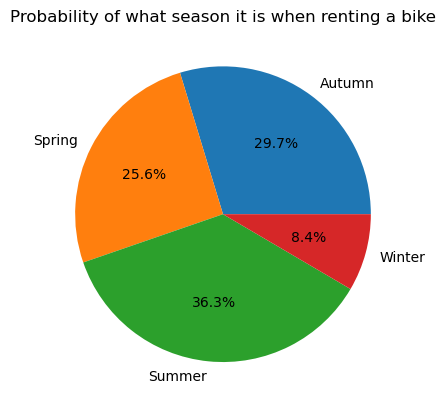

In [369]:
probability_per_seasons = [["Autumn", counts_per_seasons[0] / Counts_Autumn],
    ["Spring", counts_per_seasons[1] / Counts_Spring],
    ["Summer", counts_per_seasons[2] / Counts_Summer],
    ["Winter", counts_per_seasons[3] / Counts_Winter]]

probability_df = pd.DataFrame(probability_per_seasons, columns = ["Seasons", "Probability"])

plt.pie(probability_df["Probability"], labels = probability_df["Seasons"], autopct = '%1.1f%%')
plt.title('Probability of what season it is when renting a bike')
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Daytype"( + Reflects differences in number of days between hoildays and no hoildays version)

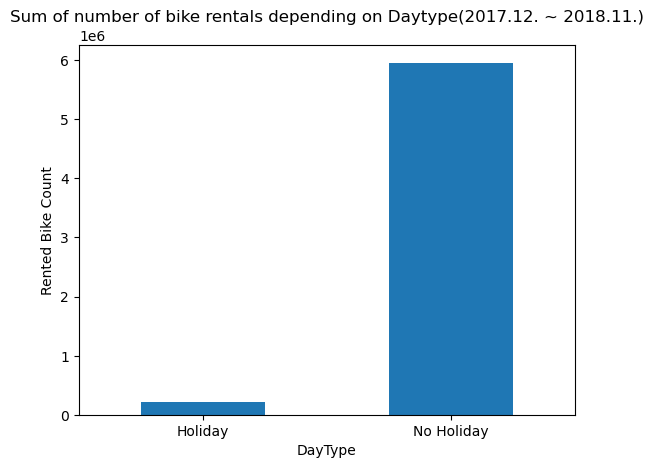

In [400]:
Counts_by_Daytype = merged_data.groupby("Holiday")["Rented Bike Count"].sum()

Counts_by_Daytype.plot(kind='bar')
plt.xlabel('DayType')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation = 'horizontal')
plt.title('Sum of number of bike rentals depending on Daytype(2017.12. ~ 2018.11.)')
plt.show()

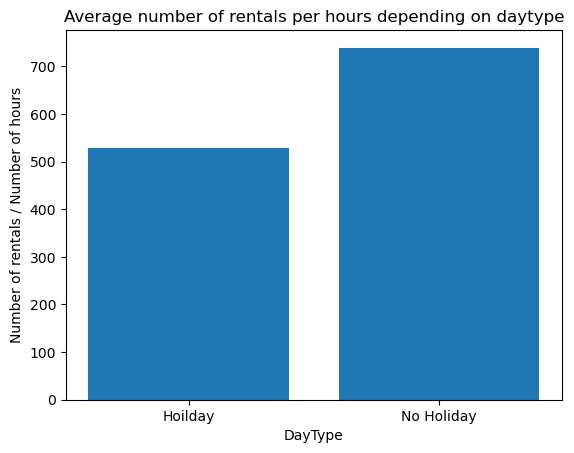

In [403]:
Counts_Hours_Holiday = merged_data[merged_data["Holiday"] == "Holiday"].shape[0] 
Counts_Hours_No_Holiday = merged_data[merged_data["Holiday"] == "No Holiday"].shape[0]

Ratio_Rental_Hoilday = Counts_by_Daytype["Holiday"] / Counts_Hours_Holiday
Ratio_Rental_No_Hoilday = Counts_by_Daytype["No Holiday"] / Counts_Hours_No_Holiday

X = ["Hoilday", "No Holiday"]
Y = [Ratio_Rental_Hoilday, Ratio_Rental_No_Hoilday]
plt.xlabel('DayType')
plt.ylabel('Number of rentals / Number of hours')
plt.title('Average number of rentals per hours depending on daytype')
plt.bar(X, Y)
plt.show()

## Visualize the relationship between "Rented Bike Count" and "Fine dust concentration" (After processing .dropna()) 

### Since the "Fine dust concentration(ug/m^3)" data may be NaN, I drop the row with NaN.

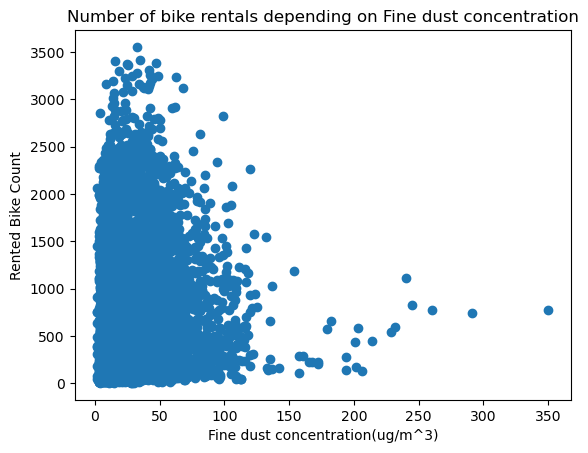

In [323]:
merged_data_dropna_ver = merged_data.dropna()

X = merged_data_dropna_ver["Fine dust concentration(ug/m^3)"]
Y = merged_data_dropna_ver["Rented Bike Count"]
plt.xlabel('Fine dust concentration(ug/m^3)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bike rentals depending on Fine dust concentration')
plt.scatter(X, Y)
plt.show()